In [1]:
import pandas as pd
import pickle
import plotly.express as px

In [2]:
with open('dictionary.pickle', 'rb') as handle:
    dict_ = pickle.load(handle)

In [3]:
dict_['Afghanistan'].head()

,Date,Celebrities & Entertainment News,Comics & Animation,Entertainment Industry,Events & Listings,Fun & Trivia,Humor,Movies,Music & Audio,Offbeat,...,Bus & Rail,Car Rental & Taxi Services,Carpooling & Ridesharing,Cruises & Charters,Hotels & Accommodations,Luggage & Travel Accessories,Specialty Travel,Tourist Destinations,Travel Agencies & Services,Travel Guides & Travelogues
1,2005-01-01 00:00:00,0,0,0,0,0,0,12,5,0,...,0,21,0,0,38,0,0,26,100,0
2,2005-02-01 00:00:00,61,0,0,98,0,27,9,11,11,...,100,29,0,0,0,0,0,23,0,0
3,2005-03-01 00:00:00,56,0,47,100,0,23,7,11,8,...,0,0,0,43,52,0,77,51,0,0
4,2005-04-01 00:00:00,40,46,0,0,10,25,8,11,7,...,0,0,0,100,66,100,100,0,0,0
5,2005-05-01 00:00:00,27,0,90,32,0,0,13,9,4,...,0,0,0,0,22,0,0,37,0,0


In [4]:
df_weight = pd.read_csv('weight.csv', index_col = 'Category')

In [5]:
df_weight = df_weight.transpose()

In [6]:
weight_columns = df_weight.columns.tolist()
weight_columns.insert(0,'Date')

In [7]:
df_summary = pd.DataFrame(index = [date.strftime('%Y-%m-%d') for date in dict_['Afghanistan']['Date']])

In [8]:
#multiply score with weights for each country
for country in dict_.keys():
    dict_[country] = dict_[country][weight_columns]
    dict_[country]['Date'] = dict_[country]['Date'].map(lambda t: t.strftime('%Y-%m-%d'))
    dict_[country].replace('<1', 1, inplace = True)
    for category in df_weight.columns.tolist():
        dict_[country].loc[:,category] = dict_[country].loc[:,category] * df_weight[category].values
    column_list = dict_[country].columns.tolist()
    column_list.remove('Date')
    dict_[country]['Total'] = dict_[country][column_list].astype(float).sum(axis=1, numeric_only=True)
    dict_[country]['Moving Average'] = dict_[country]['Total'].rolling(60, closed='left').mean()
    dict_[country]['Indexed Against Average'] = (dict_[country]['Total'].divide(dict_[country]['Moving Average'])) * 100
    dict_[country]['50% Downweighted'] = (dict_[country]['Indexed Against Average'] - 100) * 0.5 + 100
    dict_[country]['Capped 130 - 70'] = dict_[country]['50% Downweighted'].clip(lower=70, upper=130)
    df_temp = dict_[country].copy()
    df_temp = df_temp[['Date','Capped 130 - 70']]
    df_temp.rename(columns = {'Capped 130 - 70':country}, inplace = True)
    df_temp.set_index('Date', inplace = True)
    df_summary = pd.merge(df_summary,df_temp,left_index=True, right_index=True)
    #dict_[country].to_excel(f'{country}_calculated.xlsx')

In [9]:
df_summary.head()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua & Barbuda,Argentina,...,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe,Åland Islands
2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_summary.dropna(how='all', inplace = True)

In [11]:
df_chart = df_summary.copy()
df_chart.reset_index(inplace=True)
df_chart.rename(columns = {'index':'Date'}, inplace = True)

In [12]:
df_summary = df_summary.transpose()

In [13]:
df_summary.to_excel('summary.xlsx')

In [14]:
df_chart = pd.melt(df_chart, id_vars = 'Date',value_vars = df_chart.columns.tolist(), var_name = 'Country', value_name = 'Score')

In [15]:
df_chart.head()

,Date,Country,Score
0,2010-01-01,Afghanistan,85.512499
1,2010-02-01,Afghanistan,96.919540
2,2010-03-01,Afghanistan,88.742046
3,2010-04-01,Afghanistan,90.759559
4,2010-05-01,Afghanistan,87.771602


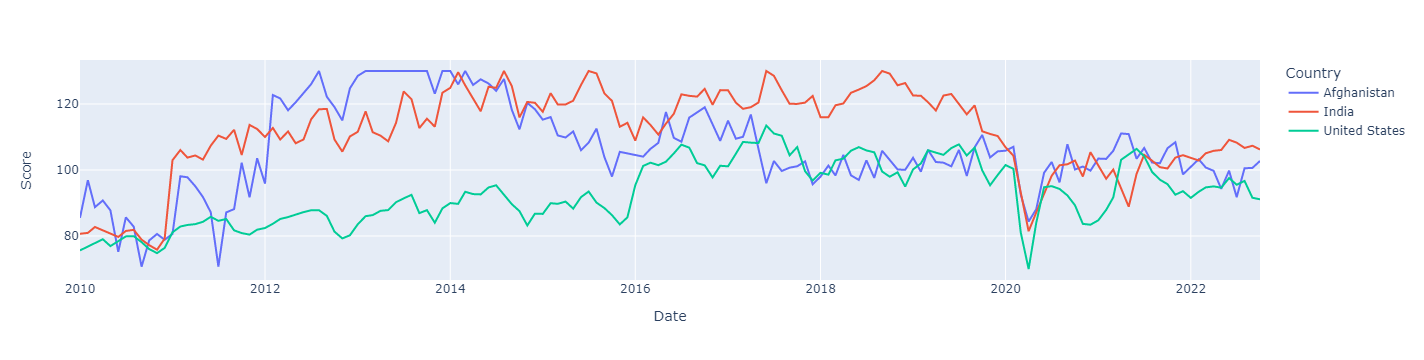

In [23]:
# pandas data frame
country = ['Afghanistan', 'India', 'United States']
df_filter = df_chart[df_chart['Country'].isin(country)]
x = df_filter['Date'].values.tolist()
y = df_filter['Score'].values.tolist()

fig = px.line(df_filter, x = x, y = y,
              labels = {'x': 'Date', 'y':'Score'}, color = 'Country')

fig.show()

In [27]:
df_chart.to_excel('for_chart.xlsx')